
# Interactive Lecture:  $J/\psi $ 2-Muon Decay in CMS Experiment

## Introduction to CMS Experiment

The Compact Muon Solenoid (CMS) is a general-purpose detector at the Large Hadron Collider (LHC) at CERN. It is designed to investigate a wide range of physics, including the search for the Higgs boson, extra dimensions, and particles that could make up dark matter. The CMS detector is particularly adept at detecting muons, which are heavier cousins of electrons.

## Understanding Muon Decay

In particle physics, muons are elementary particles similar to electrons but with a much greater mass. They are often produced in high-energy collisions and can decay into other particles. 

## Objectives

1. Analyze data from the CMS experiment to identify events where particles decay into two muons.
2. Calculate the invariant mass of the muon pairs to identify potential parent particles.
3. Fit the invariant mass distribution to extract meaningful physical parameters.

Let's get started by exploring the CMS event display and understanding the data we will be working with.

## CMS Event Display

An event display is a graphical representation of the data collected from particle collisions, showing the trajectories and interactions of particles within a detector. It helps physicists visually analyze and interpret complex collision events to identify and study various particles and their properties.

https://www.i2u2.org/elab/cms/event-display/

https://ispy-webgl-masterclass.web.cern.ch/

## $J/\psi $ decay - charm-anticharm final state


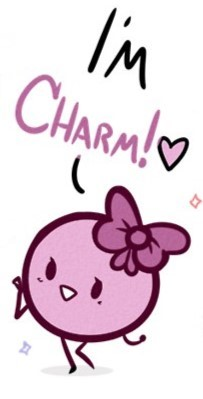 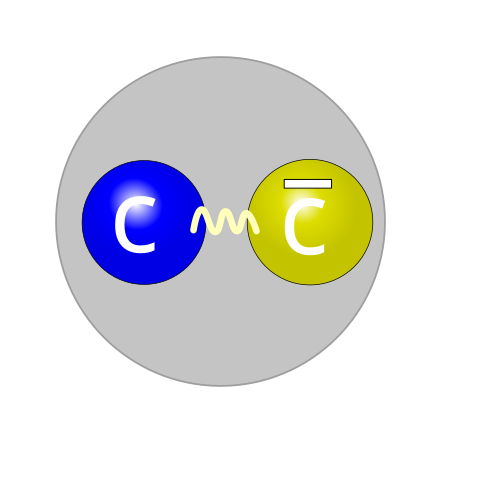


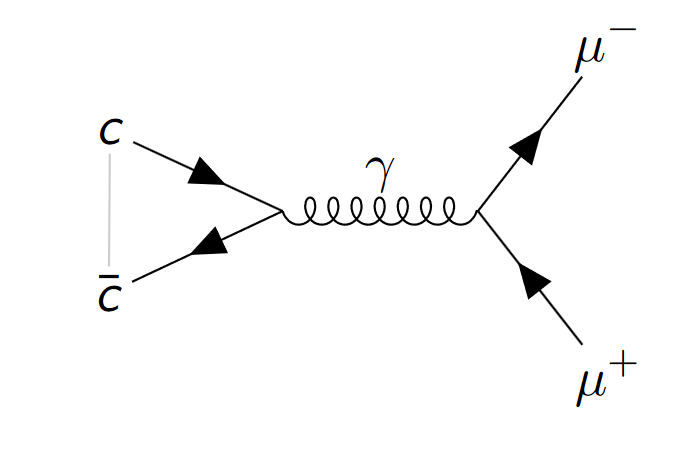

## Example event with 2 muons (red)
Here is a $J/\psi$ candidate which decay's to 2 muons

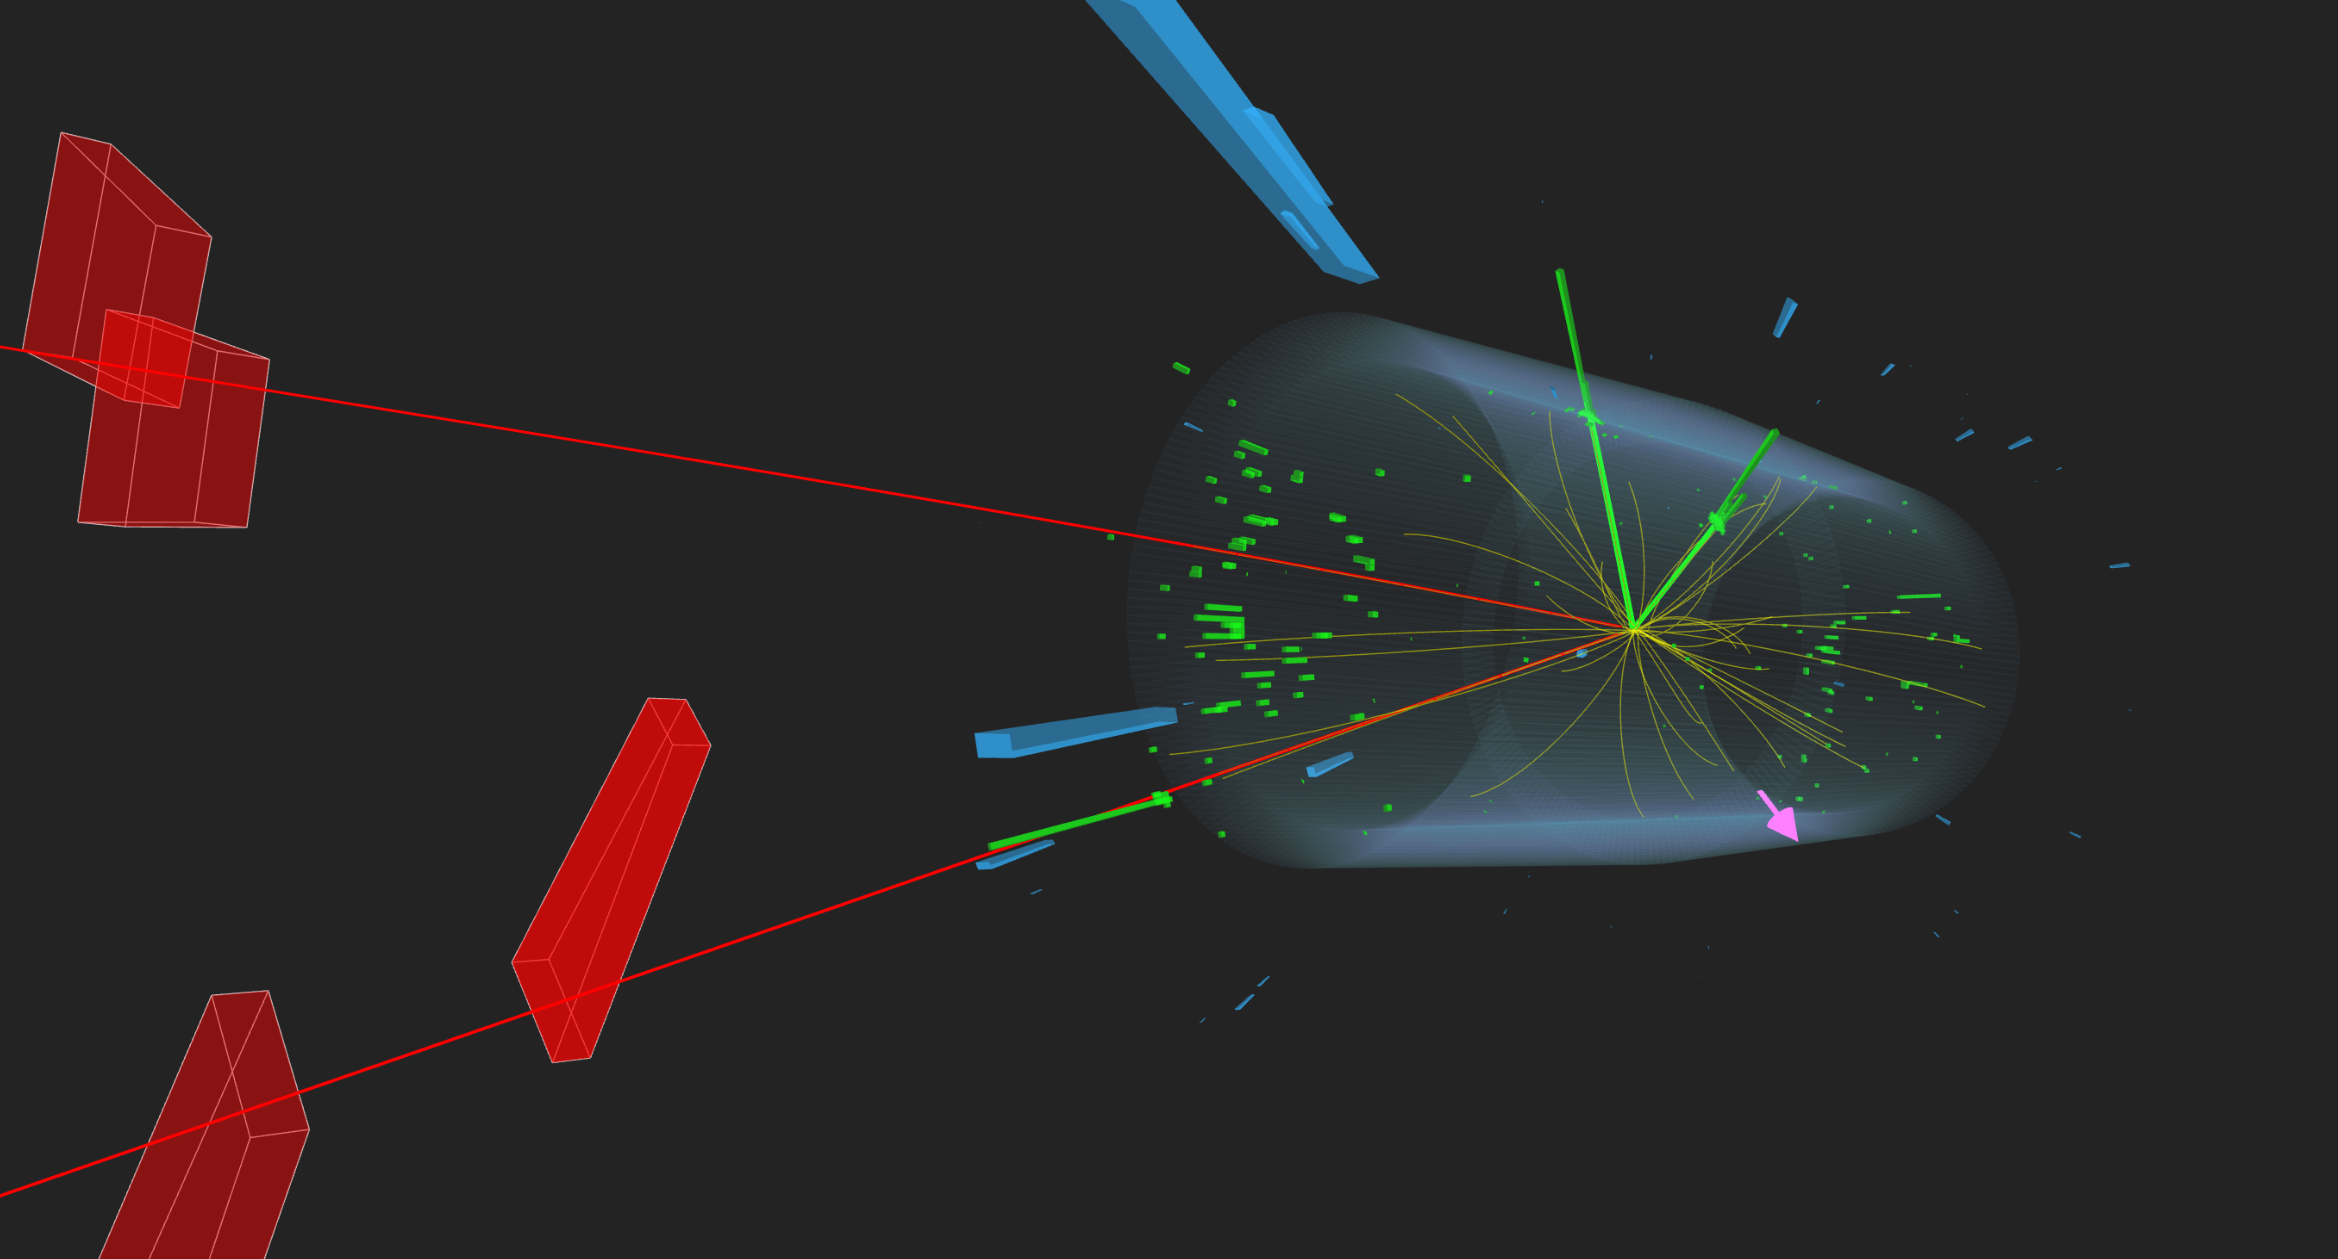





## How and Why We Describe Particles in High-Energy Physics


### Why We Use Momentum to Describe Particles

1. **High Speeds (Relativity)**:
   - Particles in high-energy experiments move near the speed of light.
   - Special relativity tells us momentum and energy are more important than position at these speeds.
2. **Conservation Laws**:
   - In particle collisions, **momentum** and **energy** are conserved. This means they remain constant before and after a collision, helping us predict outcomes.
   - These conserved quantities make it easier to understand and describe what happens in particle interactions.
3. **Wave-Particle Duality**:
   - Particles can behave both like particles and waves. Their momentum tells us about their wave properties, like wavelength, making momentum space more natural to use.

### How We Describe Particles

We use three main quantities to describe particles in high-energy physics:
1. **Transverse Momentum ($ p_T $)**:
   - This is the momentum of a particle in the plane **perpendicular** to the direction of the particle beams in a collider.
   - Formula: $ p_T = \sqrt{p_x^2 + p_y^2} $
   - It tells us how fast the particle is moving sideways from the beamline.

2. **Pseudorapidity ($ \eta $)**:
   - Instead of using the z-axis momentum, we use $ \eta $, which describes how far the particle is from the beam axis (z-direction).
   - Formula: $ \eta = -\ln \left( \tan \frac{\theta}{2} \right) $ (where $ \theta $ is the angle from the beam).
   - Why use rapidity instead of the angle? Well it turns out that particle production in collisions is roughly constant as a function of rapidity, which makes things very nice. Also, differences in (pseudo)rapidity are Lorentz invariant, unlike differences in the angle.

3. **Azimuthal Angle ($ \phi $)**:
   - This is the angle the particle makes in the **x-y plane** around the beamline.
   - Formula: $ \phi = \arctan2(p_y, p_x) $
   - It tells us the direction the particle is moving in the plane perpendicular to the beam.

In high-energy physics, we describe particles using their **momentum** rather than their position because it is easier to track, conserved in collisions, and fits better with the wave-like nature of particles.

### Interlude - why we use $p_T$, $\eta$ and $\phi$       


### **$p_T , \eta, \phi \Leftrightarrow  p_x, p_y,p_z$**
   

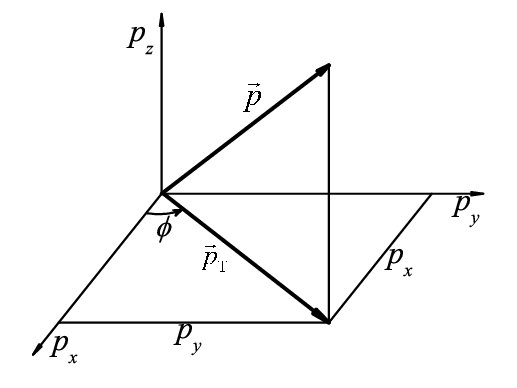


| **Variables in High Energy Physics** | **Traditional Cartesian Variables** | **Formula**                                     |
|--------------------------------------|-------------------------------------|-------------------------------------------------|
| $ p_T $ (transverse momentum)      | $ p_x, p_y $                      | $ p_T = \sqrt{p_x^2 + p_y^2} $                |
| $ \eta $ (pseudorapidity)          | $ p_z $                             | $ \eta = -\ln \left( \tan \frac{\theta}{2} \right) $ where $ \theta = \arctan \frac{p_T}{p_z} $ |
| $ \phi $ (azimuthal angle)         | —                                                | $ \phi = \arctan2(p_y, p_x) $                |



In [17]:
# Import the necessary modules. Pandas is for the data-analysis and numpy for scientific calculation.
# Name these to "pd" and "np".
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 
# Create a new DataFrame structure and save it in the file 'dataset'. 
# Data can be obtained from a file with the read_csv() -function. Inside the parentheses, we write the path of the file.
# In this case, we use a web address.
dataset = pd.read_csv("https://opendata.cern.ch/record/5203/files/Jpsimumu.csv") 
dataset.head(10) # Show the first 10 rows of the dataset

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
1,165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
2,165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
3,165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
4,165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1
5,165617,74981507,G,30.5862,15.5218,5.1293,-25.8509,16.3474,-1.2391,0.3192,1,G,12.4868,7.7640,1.0425,-9.7233,7.8337,-1.0421,0.1335,-1
6,165617,75612982,G,7.5544,1.2913,-5.3588,-5.1646,5.5122,-0.8361,-1.3343,-1,T,3.8416,-0.9896,-3.4548,-1.3534,3.5938,-0.3682,-1.8498,1
7,165617,74760204,G,24.6376,9.9836,19.1426,-11.8697,21.5896,-0.5253,1.0901,1,G,11.0213,3.3785,7.8272,-6.9841,8.5252,-0.7476,1.1633,-1
8,165617,75017052,G,22.5057,5.6296,-9.9497,19.3857,11.4319,1.2987,-1.0559,1,G,30.5709,4.9468,-13.6360,26.9102,14.5055,1.3769,-1.2228,-1
9,165617,75204668,G,10.7051,-8.4664,-2.2374,-6.1564,8.7571,-0.6551,-2.8832,1,G,55.1896,-45.0429,-16.6152,-27.2205,48.0096,-0.5403,-2.7882,-1


Each line contains a single Event with 2 detected muons:
|**Run number**|**Event number**|Muon1 Info|Muon2 Info|
| -------- | ------- |-------- | ------- |

The kinematic properties of the muons are stored in columns. 
For the "first" muon they are called `Q1, E1, px1, py1, pz1, pt1, eta1, phi1,` and for the "second" one `Q2, E2, px2, py2, pz2, pt2, eta2, phi2`.


**Muon Info**:
|Variable|Description|
| -------- | ------- |
|**type** |	Either T or G: whether the muon is a tracker or global muon|
|**E** |	The total energy of the muon (GeV)|
|**px,py,pz**| 	The components of the momemtum of the muon (GeV/*c*)|
|**pt** |	The transverse momentum of the muon (GeV/*c*)|
|**eta** |	The pseudorapidity of the muon|
|**phi** |	The phi angle of the muon (rad)|
|**Q** |	The charge of the muon|


### Invariant mass $M$
Particles have a mass that describes their inertia. It is the same mass $m$ that is used in Newton’s second law and Einstein’s equation $E=mc^2$ (where E means the energy of the particle at rest). It is impossible to measure e.g. $J/\psi$ meson, whose mean lifetime is in the order of $ 10^{-21} $ seconds. When a particle such as the $J/\psi$ meson decays, new particles are formed. The new particles may move at very high speeds and may even not have a mass (e.g. photons). However, a detector can measure the momentum and energy of these particles, from which we can calculate the invariant mass. It is a property that is “invariant” to the environment it’s measured in. If it is calculated to two particles that come from another particle, we achieve a value that is close to the mass of the original particle. For example, the $J/\psi$ meson can decay into 2 muons, whose momentum and energy we can measure with a detector. From these we can calculate the invariant mass, which would correspond to the mass of the $J/\psi$ meson, since the muons come from $J/\psi$.

Invariant mass is a mathematical concept, not a physical mass.

The invariant mass is conserved when a particle decays into other particles, which makes it an unbeatable tool for particle physics. A detector detects mostly stable particles. In order to determine which decay processes produce these stable particles, researchers must analyze large amounts of data. We can calculate the invariant mass to multiple different events and make a histogram out of our calculated values.

The invariant mass of the two particles **1** and **2** is determined by the equation

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}, $$

where $E_1$ and $E_2$ are the energies of the decay products and $\vec{p_1}$ and $\vec{p_2}$ the momenta of the decay products.
Or, after some approximation ($E >> m$) and playing with formulas:

$$ M = \sqrt{2p_{T_1}p_{T_2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))} $$


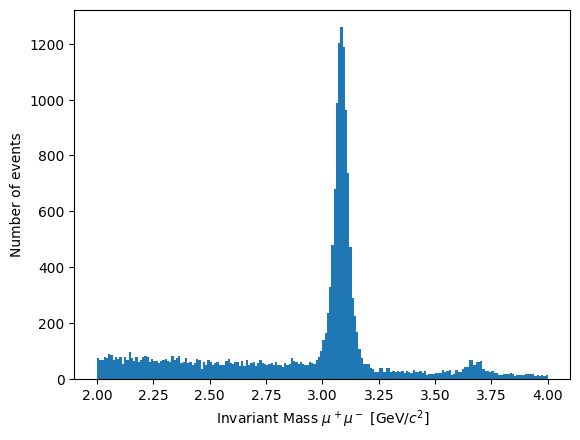

In [42]:

dataset['Invariant Mass'] = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2)-np.cos(dataset.phi1-dataset.phi2))) # use the formula above 
plt.hist(dataset['Invariant Mass'], bins=200, range=(2,4)) # Plot a histogram of the data in the column 'Invariant Mass' with 500 bins and a range from 2 to 4 GeV/c^2.
plt.xlabel('Invariant Mass $\mu^+\mu^-$ [GeV/$c^2$]') # Label the x-axis as 'Invariant Mass [GeV/c^2]'
plt.ylabel('Number of events') # Label the y-axis as 'Number of events'
plt.show()

## Let's try to fit the peak and see how many $J/\psi$ mesons there are


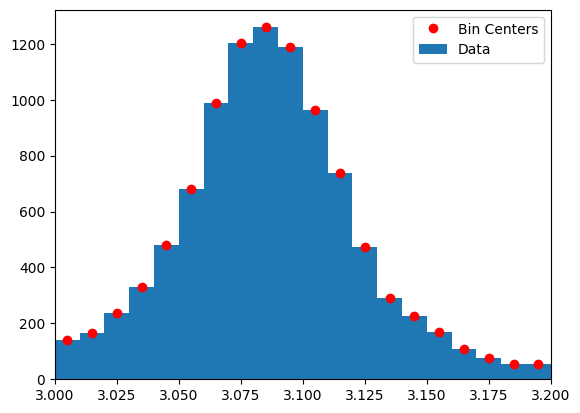

In [43]:
hist, bin_edges = np.histogram(dataset['Invariant Mass'], bins=200, range=(2,4))
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
# Plot the histogram and bin centers
plt.plot(bin_centers, hist, 'ro', label='Bin Centers')
plt.hist(dataset['Invariant Mass'], bins=200 , range=(2,4), label='Data')
# draw it in range 3 to 3.2
plt.xlim(3,3.2)
plt.legend()
plt.show()


We will use a Gaussian function
$f(x)=A\cdot  \exp{ (\frac{x-\mu}{\sigma})^2}$

Question: Why Gauss? (Hint: central Limit Theorem)

Actually, the decay is described by Breit-Wigner function however, detector resolution makes it more Gaussian

In [20]:
from scipy.optimize import curve_fit #
def fit_function(x,amplitude,mean,sigma): # Define the fit function
    return amplitude*np.exp(-((x - mean) / sigma) ** 2)

fit_parameters, _ = curve_fit(fit_function, bin_centers, hist, p0=[1200, 3.1, 0.1]) # fit the function with initial guess for parameters A = 1200, mean = 3.1 and sigma = 0.1
# print the fit parameters in normal format
print("amplitude = ", fit_parameters[0])
print("mean = ", fit_parameters[1])
print("sigma = ", fit_parameters[2])

amplitude =  1217.9422846017312
mean =  3.084893640973022
sigma =  0.043904761833769596


#### Let's draw our fit and histogram

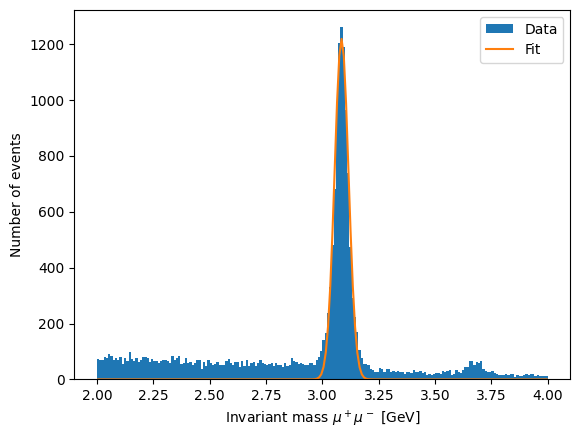

In [21]:
plt.hist(dataset['Invariant Mass'], bins=200, range=(2,4), label='Data') # Plot the histogram of the data
plt.plot(bin_centers, fit_function(bin_centers, *fit_parameters), label='Fit') # Plot the fit function with the fit parameters
plt.xlabel('Invariant mass $\mu^+\mu^-$ [GeV]')
plt.ylabel('Number of events')
plt.legend()
plt.show()

### It did not quite catched the fit because of background
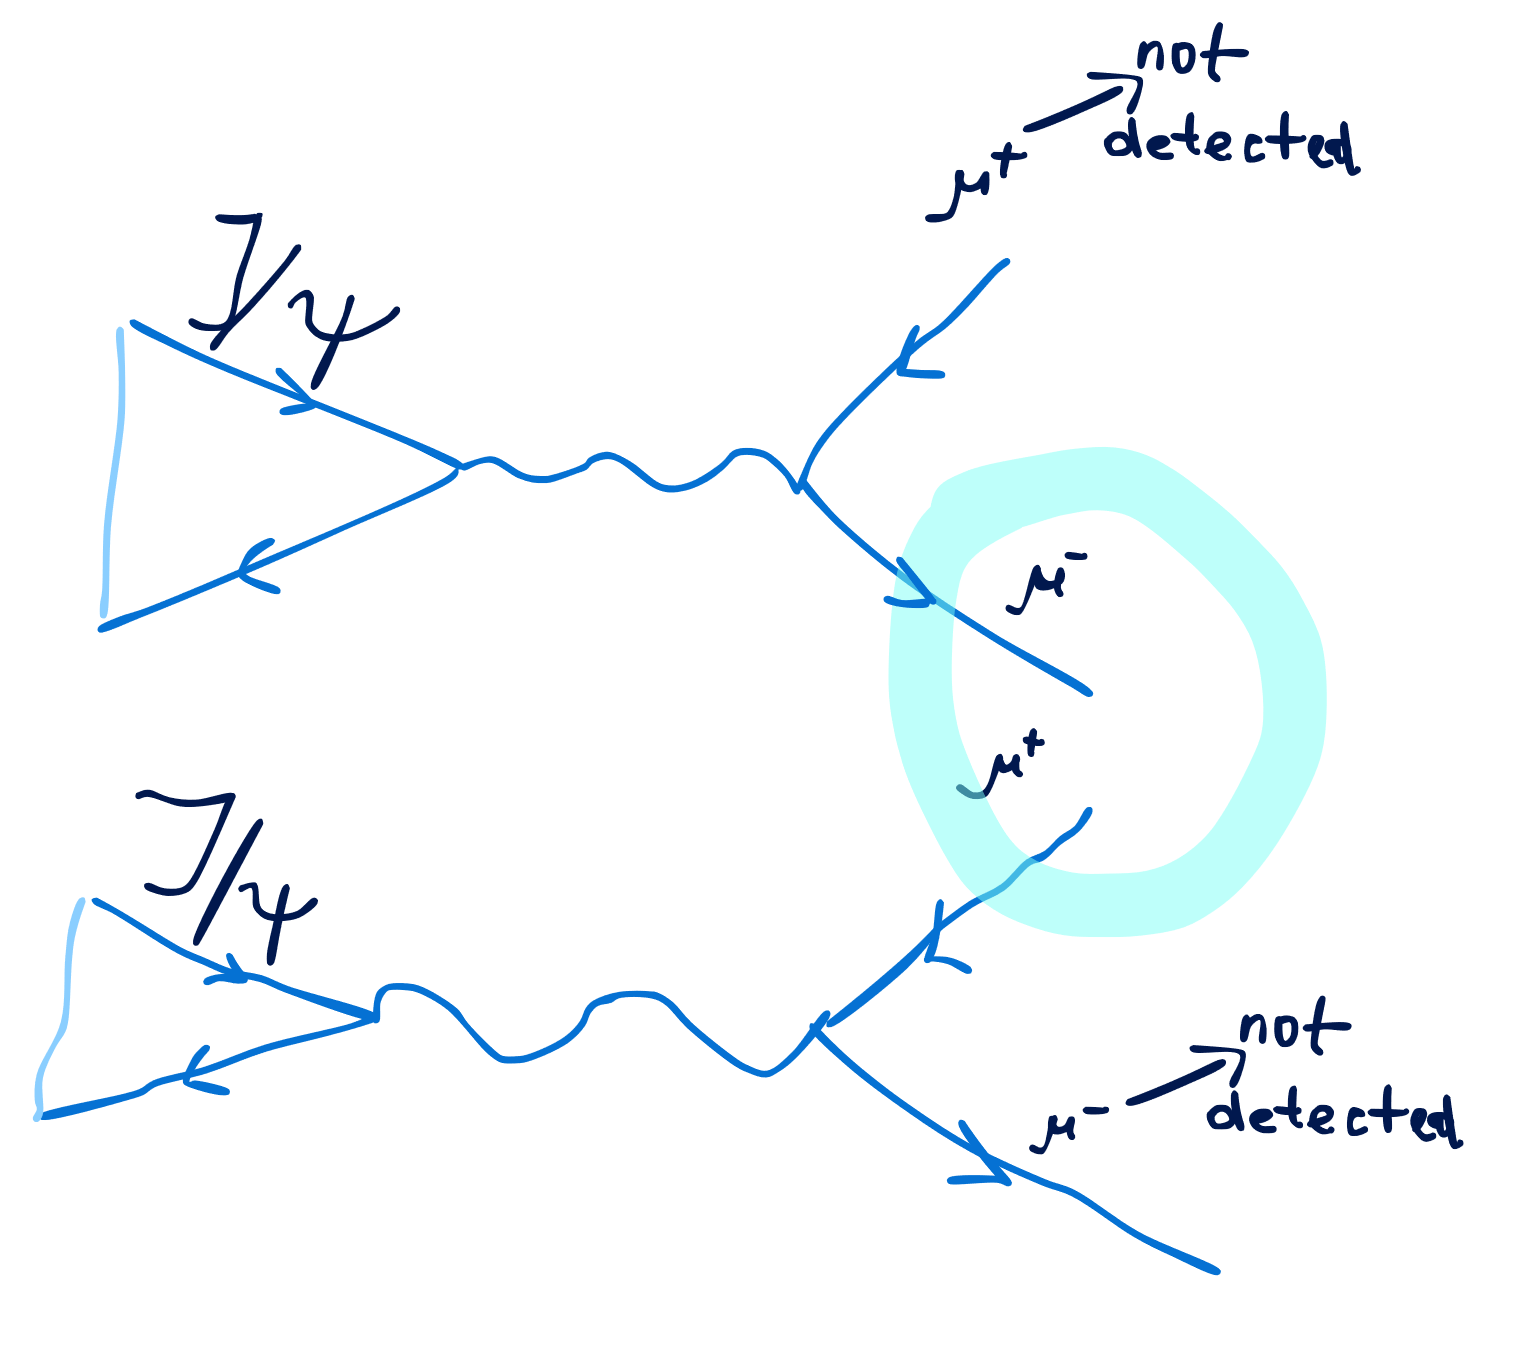


Now, the function will be : $f(x)=A\cdot  \exp{ (\frac{x-\mu}{\sigma})^2} + b x + c$, 

where $ax+b$ is the first order polynomial for background

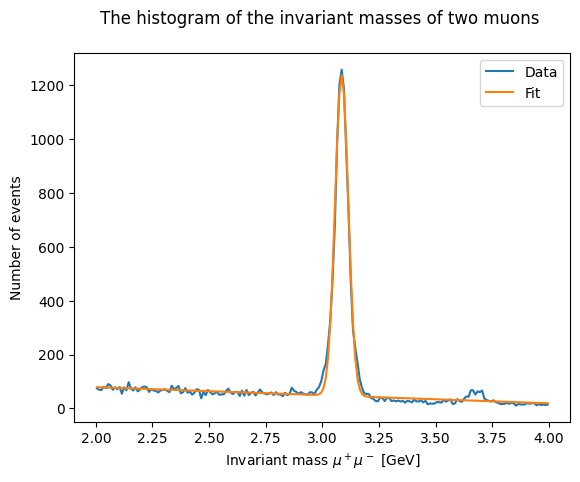

In [22]:
def fit_with_background(x,amplitude,mean, sigma, b, c):     # Define the fit function with background
    return amplitude*np.exp(-((x - mean) / sigma) ** 2) + b*x + c

fit_parameters, _ = curve_fit(fit_with_background, bin_centers, hist, p0=[1000,3, 0.1, 0, 0]) # fit the function with initial guess for parameters A = 1000, mean = 3, sigma = 0.1, b = 0 and c = 0

plt.plot(bin_centers, hist, label='Data') # Plot the histogram of the data
plt.plot(bin_centers, fit_with_background(bin_centers, *fit_parameters), label='Fit') # Plot the fit function with the fit parameters

# add some nice description
plt.xlabel('Invariant mass $\mu^+\mu^-$ [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons \n')
plt.legend()

In [23]:
# print the fit parameters in normal format
print("amplitude = ", fit_parameters[0], )
print("mean = ", fit_parameters[1], "GeV/c^2")
print("sigma = ", fit_parameters[2], "GeV/c^2")

amplitude =  1192.564998830419
mean =  3.0849854873459477 GeV/c^2
sigma =  0.041105969979413896 GeV/c^2


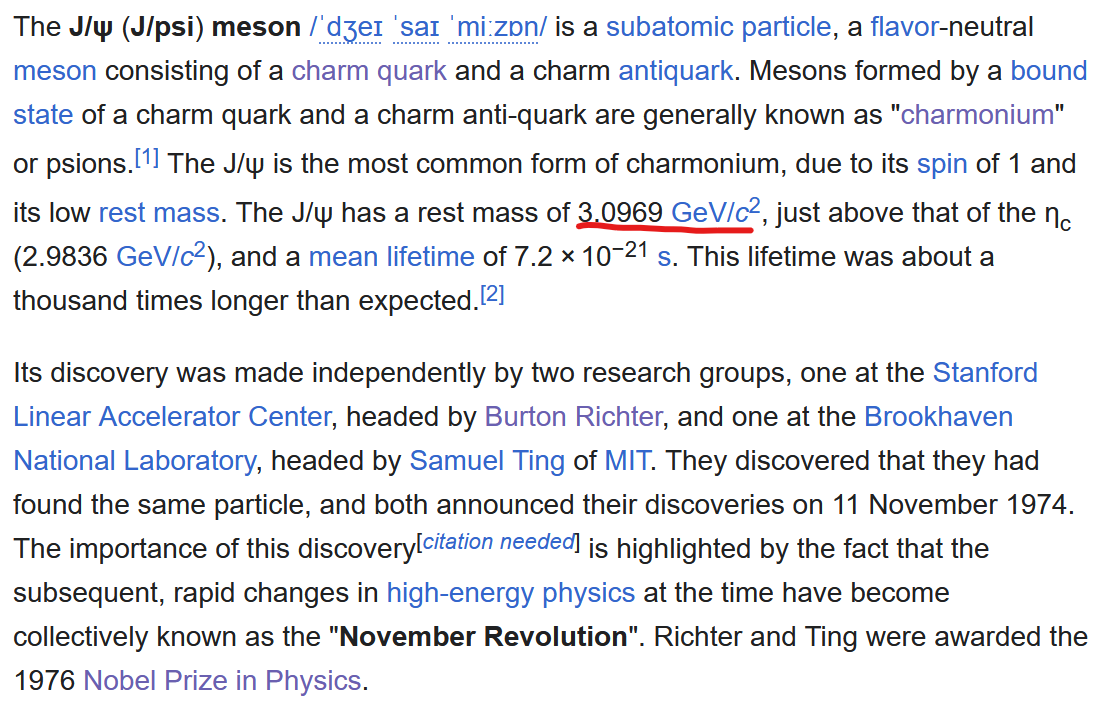

#### Actually, the original mass is quite close, the difference is because of detector calibration and resolution

### We can add one more Gaussian to fit a samll peak right to the main one

amplitude =  1193.754828772445
mean =  3.0849910527387214
sigma =  0.04122008172492288
amplitude2 =  41.34800669241192
mean2 =  3.6779291346355127
sigma2 =  -0.04288483995513765


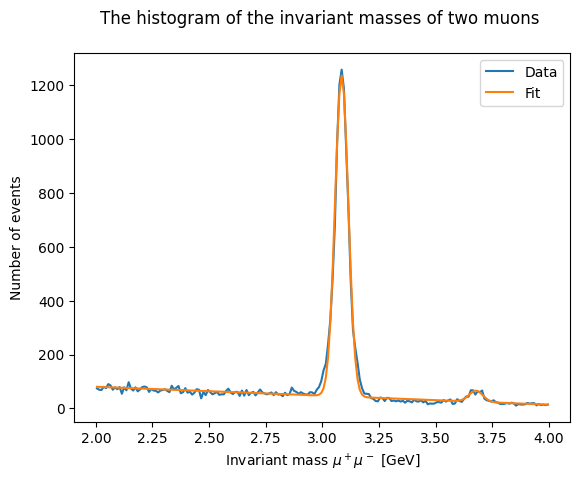

In [27]:
def fit_with_background(x, amplitude,mean, sigma,amplitude2,mean2, sigma2, b, c):
    return amplitude*np.exp(-((x - mean) / sigma) ** 2) + amplitude2*np.exp(-((x - mean2) / sigma2) ** 2) + b*x + c

fit_parameters, _ = curve_fit(fit_with_background, bin_centers, hist, p0=[1000,3, 0.1,  100, 3.6, 0.1, 0, 0])

plt.plot(bin_centers, hist, label='Data' )
plt.plot(bin_centers, fit_with_background(bin_centers, *fit_parameters), label='Fit')
plt.xlabel('Invariant mass $\mu^+\mu^-$ [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons \n')
plt.legend()

# print the fit parameters in normal format
print("amplitude = ", fit_parameters[0])
print("mean = ", fit_parameters[1])
print("sigma = ", fit_parameters[2])
print ("==============================")
print ("amplitude2 = ", fit_parameters[3])
print ("mean2 = ", fit_parameters[4])
print ("sigma2 = ", fit_parameters[5])


### Second peak is another particle called $\psi\prime$ or $\psi (2S)$

### Now let's subtract the background from the data histogram

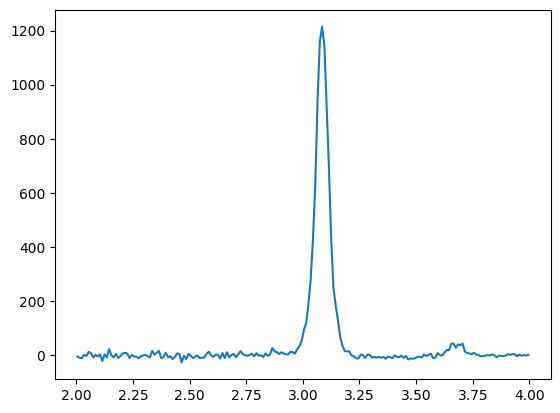

In [31]:
def background(x, b, c):
    return b*x + c

b= fit_parameters[6]
c= fit_parameters[7]

plt.plot(bin_centers, hist - background(bin_centers, b, c )) # Plot the histogram of the data minus the background


### We can also estimate some quantities such as Signal-over-Background Ratio ($S/B$), and Significance ($S/\sqrt{S+B}$)


In [51]:
#  integrate the signal peak within 3 standard deviations of the mean
mean = fit_parameters[1]
sigma = fit_parameters[2]
b   = fit_parameters[6]
c   = fit_parameters[7]

lower_bound = mean - 3*sigma
upper_bound = mean + 3*sigma

all_integral = np.sum(hist[ (bin_centers > lower_bound) & (bin_centers < upper_bound)] )  # integrate the signal peak
background_integral = np.sum(background(bin_centers, b, c)[ (bin_centers > lower_bound) & (bin_centers < upper_bound)] ) # integrate the background
signal = all_integral - background_integral 

print ("The integral of the background is", background_integral)
print ("The integral of the signal peak is", signal)
print ("The significance of the signal is", signal/np.sqrt(signal+background_integral )) 

print ("S/B = ", signal/background_integral)    

The integral of the background is 1100.2897831345776
The integral of the signal peak is 9081.710216865422
The significance of the signal is 90.0017789731849
S/B =  8.253925789434172


#### A rule of thumb is that if you want to analyze a particle, the significance should be $>5$

# That was a basic example of what particle physicists do